In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk
#import networkx as nx
import re 

path = "d:/Facultad/Tesis/"
base = pd.read_csv(path+'Corpus_medios_nac.csv')

C:\Users\Ale\AppData\Local\Temp\ipykernel_7356\2536909394.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv(path+'Corpus_medios_nac.csv')


In [4]:
print(set(base['medio']))

{'ellitoral', 'barilochedigital', 'pagina12', 'elciudadanodiario', 'elsigloweb', 'diarionorte', 'diariotextual', 'opisantacruz', 'eldiadelaplata', 'elciudadanoweb', 'chubutparatodos', 'tunoticia', 'diarionoticias', 'lagacetasalta', 'radiomitre', 'elzonda', 'jujuyaldia', 'santacruzalmomento', 'eldoce', 'tncorrientes', 'ultimahora', 'elpregon', 'misionesonline', 'informatesalta', 'losandes', 'laprensa', 'losprimerostv', 'diariouno', 'corrienteshoy', 'elesquiu', 'lamañanaformosa', 'app', 'infobae', 'lagaceta', 'lanacion', 'tn', 'clarin', 'laredlarioja', 'infomerlo', 'm24digital', 'elliberal', 'diariamente', 'chacodiapordia', 'informedigital', 'laprensafederal', 'elindependiente', 'vocescriticas', 'opinionciudadana', 'lamañanacordoba', 'elancasti', 'eltiemposanjuan', 'primeraedicion', 'telam', 'ambito', 'elcomodorense', 'surenio', 'lavoz'}


In [2]:
def replace(x):
    x = str(x)
    x = x.replace('”', '"')
    x = x.replace('“', '"')
    x = x.replace('”', '"')
    x = x.replace('\x93', '"')
    x = x.replace('\x94', '"')
    
    return x

def extract_quotes(x):
    return re.findall('"([^"]*)"', x)

def words_length(x):
    return len(x.split(" "))

def pre_process_quoted(df):
#    df['nota'] = df['nota'].apply(replace)
    df.loc[:, 'nota'] = df['nota'].apply(replace)
    #df['citas']  = df['nota'].apply(extract_quotes)
    df.loc[:, 'citas'] = df['nota'].apply(extract_quotes)

    df_quoutes2 = pd.DataFrame({'Fecha': df['fecha'].iloc[1:], 'Hora': df['hora'].iloc[1:], 'Cita': df['citas'].iloc[1:], 'Link': df['link'].iloc[1:], 'Nota': df['nota'].iloc[1:]})
    df_quoutes = df_quoutes2.explode('Cita') # Cada cita sea una fila distinta
    df_quoutes = df_quoutes.dropna(subset=['Cita']) # Elimino la filas que no haya quotes

    #df_quoutes['Citas'] = df_quoutes['Citas'].apply(replace)

    df_quoutes = df_quoutes.reset_index()
    df_quoutes = df_quoutes.drop(['index'], axis = 1)
    df_quoutes['Cant_Palabras'] = df_quoutes['Cita'].apply(words_length) # genero columna que cuente la cantidad de plabaras
    df_quoutes_pf = df_quoutes[df_quoutes['Cant_Palabras'] > 4]
    df_quoutes_pf = df_quoutes_pf[df_quoutes_pf['Cant_Palabras'] < 60]
    df_quoutes_pf = df_quoutes_pf.reset_index()
    df_quoutes_pf = df_quoutes_pf.drop(['index'], axis = 1)
    return df_quoutes_pf

In [3]:
base['fecha'] = pd.to_datetime(base['fecha'])

año = '2020'
mes_inicio = '06'
mes_fin = '12'

fecha_inicio = pd.to_datetime(f'{año}-{mes_inicio}-01')
fecha_fin = pd.to_datetime(f'{año}-{mes_fin}-01')

sub_base = base[(base['fecha'] >= fecha_inicio) & (base['fecha'] <= fecha_fin)]
sub_base = pre_process_quoted(sub_base)

pathGit = 'd:/Git_Proyects/Tesis/Base_Medios_Arg/'
clusters = pk.load(open(pathGit+f'clusters_nac/clusters_85_{mes_inicio}_{mes_fin}_{año}.pk', 'rb'))
frases = pk.load(open(pathGit+f'nac_{mes_inicio}_{mes_fin}_{año}.pk', 'rb'))

C:\Users\Ale\AppData\Local\Temp\ipykernel_14492\2988443832.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'citas'] = df['nota'].apply(extract_quotes)


In [4]:
cluste_map = {frases[j]: str(i+1) for i, clus in enumerate(clusters) for j in clus}
sub_base['id_cluster'] = sub_base['Cita'].map(cluste_map)
sub_base = sub_base.dropna(subset=['id_cluster'])

62   Se destaca que en Facebook la única página de políticos a la que le dio 'Me Gusta' es a la de Laura Alonso
2020-06-05 00:00:00
[1, 1, 25, 12]


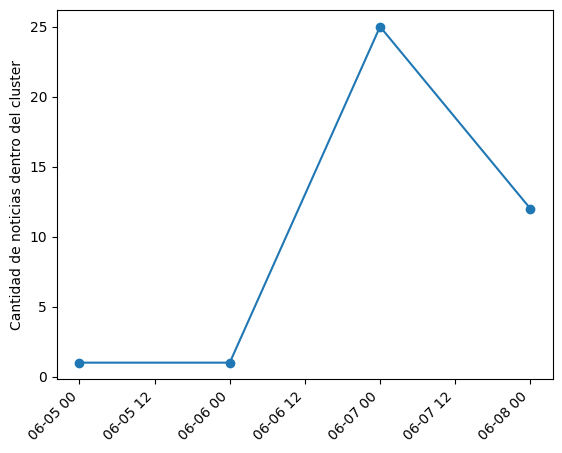

8   Orgulloso de los miles de argentinos que salieron ayer para decirle basta al miedo y al atropello, y sí al trabajo, al respeto y a la libertad
2020-08-18 00:00:00
[28.0, 6.0, 1.0, 1.0, 1.0, 7.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 11.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


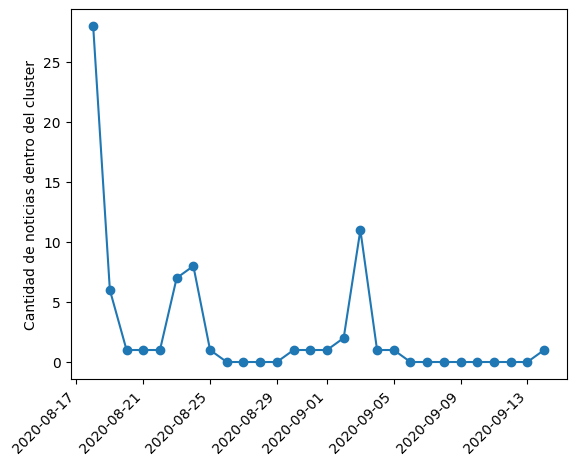

5   es un crimen de la mayor gravedad institucional
2020-07-04 00:00:00
[8.0, 31.0, 13.0, 7.0, 2.0, 5.0, 4.0, 0.0, 3.0, 4.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


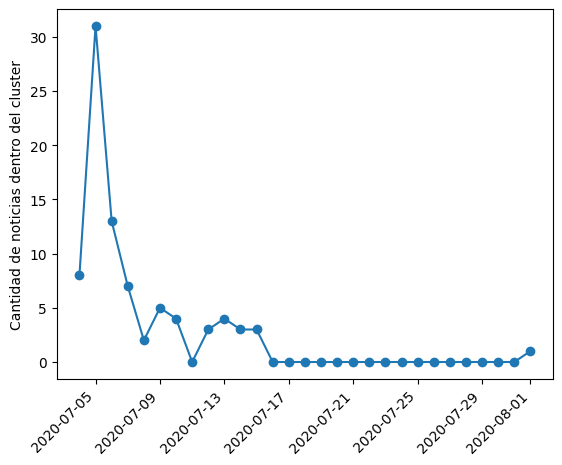

12   Desde el Gobierno ha comenzado a hablarse de la creación de un ingreso básico universal, con carácter permanente. De avanzar en esta dirección, para su puesta en marcha es preciso determinar un monto por beneficiario adecuado con el objetivo de erradicar al menos la pobreza extrema y mejorar la distribución del ingreso
2020-07-25 00:00:00
[2.0, 0.0, 1.0, 23.0, 41.0]


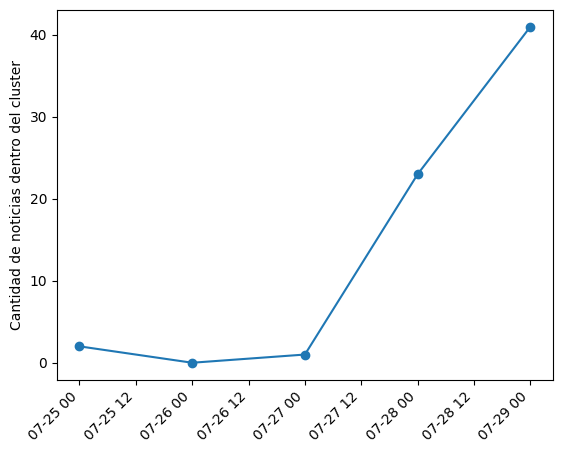

19   que se mueran todos los que tengan que morirse
2020-08-24 00:00:00
[25.0, 6.0, 3.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 3.0, 1.0, 0.0, 0.0, 0.0, 1.0]


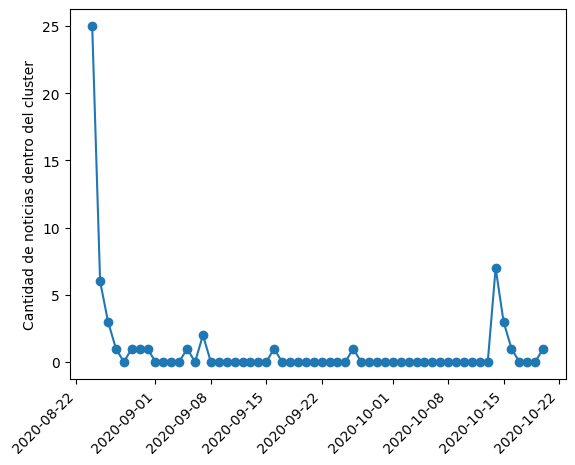

20   , enfatizó. El gobernador aseguró que 
2020-06-05 00:00:00
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 44.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]


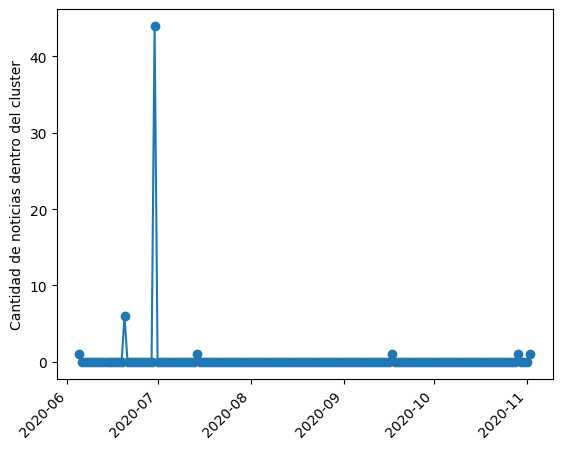

0

In [5]:
def grafico_posibles_series(df, frases_threshold, dias_threshold):
    grouped = df.groupby(['Fecha', 'id_cluster']).size().reset_index(name='num_frases')
    clusters_id_max_30 = list(set(grouped[grouped['num_frases']>frases_threshold]['id_cluster']))
    for clus in clusters_id_max_30:        
        cluster_1 = df[df['id_cluster'] == str(clus)].copy()
        cluster_1['longitud'] = cluster_1['Cita'].apply(lambda x: len(x))
        longest_phrase_row = cluster_1.loc[cluster_1['longitud'].idxmax()]['Cita']
        conteo_fechas = cluster_1['Fecha'].value_counts().reset_index()
        cont_ordenado = conteo_fechas.sort_values('Fecha')
        fecha_minima = cluster_1['Fecha'].min()
        fecha_maxima = cluster_1['Fecha'].max()
        rango_fechas_completo = pd.date_range(fecha_minima, fecha_maxima, freq='D')
        df_fechas = pd.DataFrame({'Fecha': rango_fechas_completo, 'count':0})
        cont_ordenado = pd.merge(cont_ordenado, df_fechas, on='Fecha',how='right')
        cont_ordenado['count_x'] = cont_ordenado['count_x'].fillna(0)

        if len(list(set(cluster_1['Fecha']))) > dias_threshold :
            plt.figure()
            print(clus, ' ',longest_phrase_row)
            plt.plot(cont_ordenado['Fecha'], cont_ordenado['count_x'], 'o-')
            print(cont_ordenado['Fecha'][0])
            print(list(cont_ordenado['count_x']))
            plt.ylabel('Cantidad de noticias dentro del cluster')
            plt.xticks(rotation=45, ha='right')
            plt.show()
        else:
            pass
    return 0
grafico_posibles_series(sub_base, 24, 3)

In [9]:
from collections import Counter
frecuencia = Counter(cluste_map.values())
frecuencia

Counter({'1': 156,
         '7': 71,
         '4': 63,
         '13': 51,
         '31': 48,
         '24': 44,
         '44': 42,
         '17': 39,
         '59': 38,
         '35': 33,
         '15': 32,
         '110': 30,
         '102': 29,
         '23': 28,
         '52': 28,
         '27': 27,
         '42': 26,
         '117': 26,
         '123': 25,
         '159': 25,
         '80': 22,
         '140': 20,
         '304': 20,
         '29': 19,
         '61': 19,
         '101': 19,
         '345': 19,
         '49': 18,
         '244': 18,
         '292': 18,
         '382': 18,
         '69': 17,
         '131': 17,
         '234': 17,
         '326': 17,
         '344': 17,
         '450': 17,
         '8': 16,
         '19': 16,
         '45': 16,
         '71': 16,
         '91': 16,
         '63': 15,
         '104': 15,
         '118': 15,
         '169': 15,
         '612': 15,
         '616': 15,
         '78': 14,
         '144': 14,
         '528': 14,
         '

In [6]:
cluste_map
[k for k, v in cluste_map.items() if v == '5']

words = []
for i in [k for k, v in cluste_map.items() if v == '8']:
    words.append(len(i.split(" ")))
np.mean(words)

20.4375